# 5. K-means for compression

In this problem, we will apply the K-means algorithm to lossy image compression, by reducing the number of colors used in an image.

We will be using the files `data/peppers-small.tiff` and `data/peppers-large.tiff`.

The `peppers-large.tiff` file contains a $512\times512$ image of peppers represented in $24$-bit color. This means that, for each of the $262144$ pixels in the image, there are three $8$-bit numbers (each ranging from $0$ to $255$) that represent the red, green, and blue intensity values for that pixel. The straightforward representation of this image therefore takes about $262144\times 3=786432$ bytes (a byte being $8$ bits). To compress the image, we will use $K$-means to reduce the image to $k=16$ colors. More specifically, each pixel in the image is considered a point in the three-dimensional $(r,g,b)$-space. To compress the image, we will cluster these points in color-space into $16$ clusters, and replace each pixel with the closest cluster centroid.

Follow the instructions below. Be warned that some of these operations can take a while (several minutes even on a fast computer)!

## (a) [15 points] [Coding Problem] K-Means Compression Implementation. 

From the data directory, open an interactive Python prompt, and type

    from matplotlib.image import imread; 
    import matplotlib.pyplot as plt;

and run `A = imread('peppers-large.tiff')`. Now, A is a “three dimensional matrix,” and $A[:,:,0], A[:,:,1]$ and $A[:,:,2]$ are $512\times 512$ arrays that respectively contain the red, green, and blue values for each pixel. Enter `plt.imshow(A); plt.show()` to display the image.

Since the large image has $262144$ pixels and would take a while to cluster, we will instead run vector quantization on a smaller image. Repeat (a) with peppers-small.tiff. Treating each pixel's $(r,g,b)$ values as an element of $\mathbb{R}^{3}$, run $K$-means with $16$ clusters on the pixel data from this smaller image, iterating (preferably) to convergence, but in no case for less than $30$ iterations. For initialization, set each cluster centroid to the $(r,g,b)$-values of a randomly chosen pixel in the image.

Take the matrix $A$ from `peppers-large.tiff`, and replace each pixel's $(r,g,b)$ values with the value of the closest cluster centroid. Display the new image, and compare it visually to the original image. Include in your write-up all your code and a copy of your compressed image.

In [1]:
from matplotlib.image import imread; import matplotlib.pyplot as plt;
import numpy as np

Shape of large image:  (512, 512, 3)


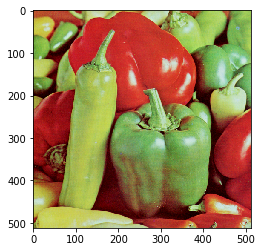

In [2]:
A = imread('data/peppers-large.tiff')
print("Shape of large image: ", A.shape)
plt.imshow(A); 
plt.show()

Shape of small image:  (128, 128, 3)


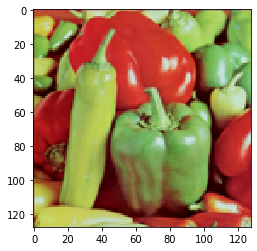

In [3]:
B = imread('data/peppers-small.tiff')
print("Shape of small image: ", B.shape)
plt.imshow(B); 
plt.show()

In [4]:
class K_mean():
    def __init__(self, image, n_clusters, max_iter = 30, eps = 1e-3):
        """
        
        data: an array of shape (m,d): m points in R^d
        n_clusters: number of clusters
        
        """
        m, d, k = image.shape
        data = image.reshape(-1,k)
        D = np.unique(data, axis = 0)
        self.centroids = D[np.random.permutation(np.arange(D.shape[0]))[:n_clusters]].astype(float)
        distances = np.zeros((m, n_clusters)) 
        clusters = np.zeros((m,), dtype = int)
        prev_centroids = np.zeros((m,d))
        it = 0
        change = 1
        
        while it < max_iter and change > eps:
        
            prev_centroids = self.centroids.copy()
            distances = dist(data, self.centroids, k) 
            clusters = np.argmin(distances, axis = 1)
            Mask = (clusters.reshape(-1,1)==np.arange(n_clusters)).astype(int)
            self.centroids = Mask.T @ data/Mask.sum(axis=0).reshape(-1,1)
            change = np.sqrt(np.sum((prev_centroids - self.centroids)**2, axis = 1)).sum()
            it += 1
        print("K_mean algorithm with {} clusters converged after {} iterations".format(n_clusters, it))
        
        
def dist(data, centroids, k):
    return np.sum((data.reshape(-1,1,k)-centroids)**2, axis = 2)
    

In [5]:
model = K_mean(image = B, n_clusters = 16, max_iter = 100, eps = 1e-3)

K_mean algorithm with 16 clusters converged after 44 iterations


In [6]:
def compress(image, centroids):
    m,n,k = image.shape
    indices= np.argmin(np.sum((image.reshape(-1,1,k)-centroids)**2,axis =2), axis = 1)
    return centroids[indices].reshape(m,n,k)

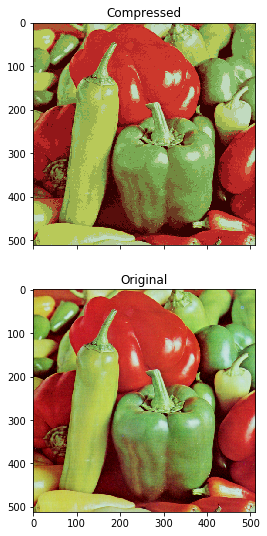

In [7]:
F = compress(A, model.centroids)

fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(7, 9))
axs[0].set_title('Compressed')
axs[0].imshow(F.astype(int), origin='upper')


axs[1].set_title('Original')
axs[1].imshow(A, origin='upper')

plt.show()

K_mean algorithm with 16 clusters converged after 156 iterations


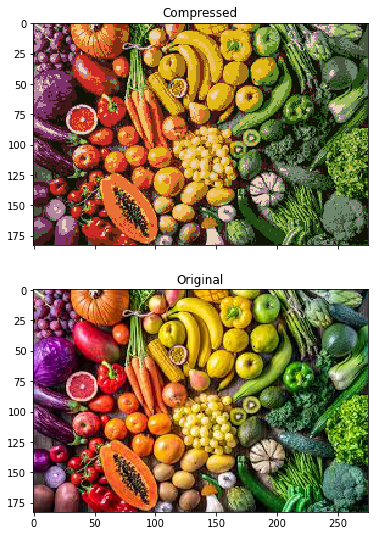

In [8]:
M = imread('data/image2.jpeg')
model = K_mean(image = M, n_clusters = 16, max_iter = 300, eps = 1e-3)
M_c = compress(M, model.centroids)

fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(7, 9))
axs[0].set_title('Compressed')
axs[0].imshow(M_c.astype(int), origin='upper')


axs[1].set_title('Original')
axs[1].imshow(M, origin='upper')

plt.show()

## (b) [5 points] Compression Factor. 

If we represent the image with these reduced (16) colors, by (approximately) what factor have we compressed the image?

### Answer:

In the original format, to represent each pixel, we need $3\times \log_2 256 = 24$ bits. But, in the copressed format, we need only $\log_2 16 = 4$ bits to represent a pixel. Therefore, we have compressed the image by factor $6$.
